In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from textblob import TextBlob

In [2]:
df = pd.read_csv('./data/tweet/tweets_british_pound.csv', delimiter=';', error_bad_lines=False, parse_dates=[1])
df.drop(columns=['permalink', 'id', 'geo', 'hashtags', 'mentions'], inplace=True)
df.rename(columns={'date' : 'DateTime'}, inplace=True)

# Get dates
df['Date'] = df['DateTime'].dt.date
df.set_index('Date', inplace=True)

df.head()

b'Skipping line 1854: expected 10 fields, saw 11\nSkipping line 3053: expected 10 fields, saw 11\nSkipping line 7607: expected 10 fields, saw 11\nSkipping line 13245: expected 10 fields, saw 11\nSkipping line 14350: expected 10 fields, saw 11\nSkipping line 16086: expected 10 fields, saw 12\nSkipping line 17006: expected 10 fields, saw 11\n'


,username,DateTime,retweets,favorites,text
Date,,,,,
2016-07-10,AthensTimes,2016-07-10 02:32:00,0,0,The title of the currency with the worst odds ...
2016-07-10,FX_Gaub,2016-07-10 02:11:00,0,0,British Pound to Euro 5-Day Forecast: GBP/EUR ...
2016-07-10,LABJnews,2016-07-10 01:36:00,0,2,The dollar is up nearly 10% since the start of...
2016-07-10,bohellberg,2016-07-10 01:30:00,1,1,British pound overtakes argentine peso to beco...
2016-07-10,RclBD,2016-07-10 01:07:00,0,0,enBusiness_news: Pound Sterling Worst Performe...


Text(0.5, 1.0, '# of Tweets with "British Pound"')

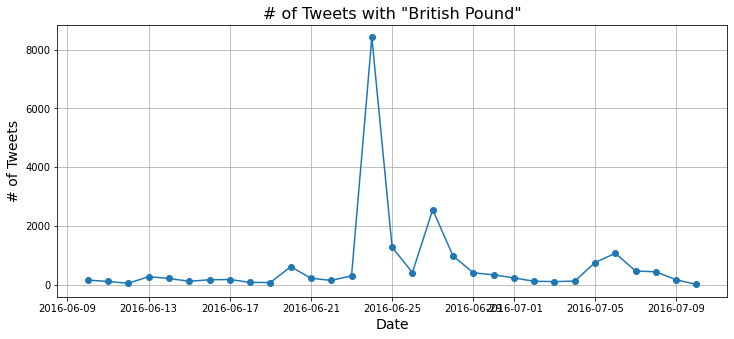

In [3]:
grouped = df.groupby('Date').count()
ax = grouped['text'].plot(figsize=(12,5), grid=True, marker='o')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)
ax.set_title('# of Tweets with "British Pound"', fontsize=16)


In [5]:
textblob_score = lambda tweet: TextBlob(tweet).sentiment.polarity

df['TextBlob Score'] = df['text'].apply(textblob_score)
df.head()

,username,DateTime,retweets,favorites,text,TextBlob Score
Date,,,,,,
2016-07-10,AthensTimes,2016-07-10 02:32:00,0,0,The title of the currency with the worst odds ...,-0.500000
2016-07-10,FX_Gaub,2016-07-10 02:11:00,0,0,British Pound to Euro 5-Day Forecast: GBP/EUR ...,0.212121
2016-07-10,LABJnews,2016-07-10 01:36:00,0,2,The dollar is up nearly 10% since the start of...,0.033333
2016-07-10,bohellberg,2016-07-10 01:30:00,1,1,British pound overtakes argentine peso to beco...,-0.500000
2016-07-10,RclBD,2016-07-10 01:07:00,0,0,enBusiness_news: Pound Sterling Worst Performe...,-0.500000


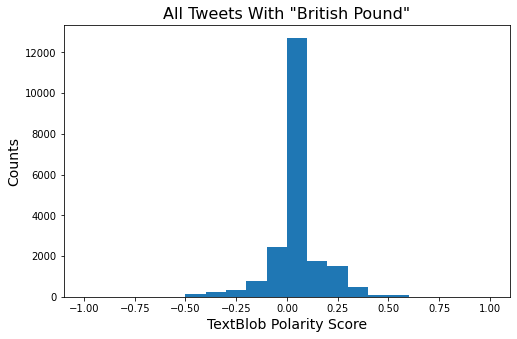

In [7]:
# Scores of all tweets
ax = df['TextBlob Score'].hist(bins=20, figsize=(8,5), grid=False)
ax.set_xlabel('TextBlob Polarity Score', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('All Tweets With "British Pound"', fontsize=16)
plt.savefig('./fig/tweet/sentiment/british_pound_tweets_all_scores.pdf')

In [10]:
# Throw out the tweets which TextBlob seems neutral 
not_neutral = np.abs(df['TextBlob Score']) > 0.101
non_neutral_df = df[not_neutral]
percent_non_neutral = len(non_neutral_df) / len(df) * 100
print(f'Number of non-neutral tweets: {len(non_neutral_df)} ({percent_non_neutral:.2f}%)')

Number of non-neutral tweets: 5111 (24.92%)


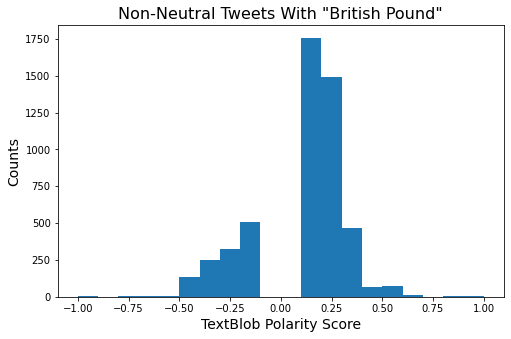

In [12]:
ax = non_neutral_df['TextBlob Score'].hist(bins=20, figsize=(8,5), grid=False)
ax.set_xlabel('TextBlob Polarity Score', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Non-Neutral Tweets With "British Pound"', fontsize=16)
plt.savefig('./fig/tweet/sentiment/british_pound_tweets_non_neutral_scores.pdf')

In [13]:
def tweet_sentiment_category(score):
    '''Classify the tweets as positive or negative, according to TextBlob sentiment scores.'''
    if score > 0.1:
        return 'P'
    return 'N'

non_neutral_df['Category'] = non_neutral_df['TextBlob Score'].apply(tweet_sentiment_category)
non_neutral_df.head()



/Users/alpakpinar/Envs/econoproject/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,username,DateTime,retweets,favorites,text,TextBlob Score,Category
Date,,,,,,,
2016-07-10,AthensTimes,2016-07-10 02:32:00,0,0,The title of the currency with the worst odds ...,-0.500000,N
2016-07-10,FX_Gaub,2016-07-10 02:11:00,0,0,British Pound to Euro 5-Day Forecast: GBP/EUR ...,0.212121,P
2016-07-10,bohellberg,2016-07-10 01:30:00,1,1,British pound overtakes argentine peso to beco...,-0.500000,N
2016-07-10,RclBD,2016-07-10 01:07:00,0,0,enBusiness_news: Pound Sterling Worst Performe...,-0.500000,N
2016-07-09,PhilipSime,2016-07-09 23:40:00,207,66,The British Pound has overtaken the Argentine ...,-0.312500,N


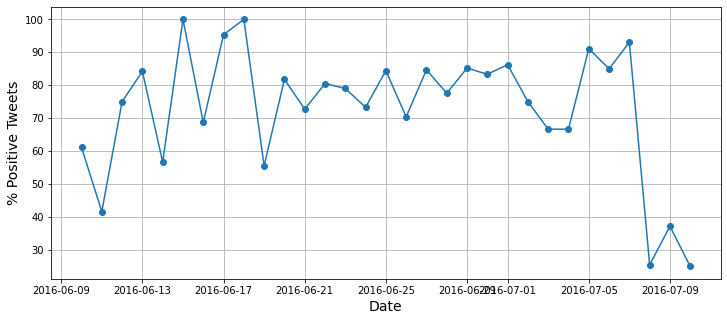

In [15]:
grouped = non_neutral_df.groupby('Date')
pos_neg_tweet_counts = grouped['Category'].value_counts().unstack()
pos_neg_tweet_counts['% P'] = pos_neg_tweet_counts['P'] / (pos_neg_tweet_counts['P'] + pos_neg_tweet_counts['N']) * 100

# Guard against NaN
pos_neg_tweet_counts.fillna(value={'% P': 100}, inplace=True)

ax = pos_neg_tweet_counts['% P'].plot(figsize=(12,5), grid=True, marker='o')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% Positive Tweets', fontsize=14)
plt.savefig('./fig/tweet/sentiment/british_pound/percent_pos_tweets_pound.pdf')